# AutoEncoder
## Rede neural com Encoder e Decoder de 1 camada
## A base de dados é a MNIST com 10 classes (dígitos de 0 a 9)

In [35]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

In [2]:
tf.GraphKeys.VARIABLES = tf.GraphKeys.GLOBAL_VARIABLES

(1) Definir a Arquitetura da rede:
    - Camada de entrada = número de features = número de pixels da imagem
      As imagens da MNIST tem 28x28 pixels, ou seja 784 features
    - Camada de saída = número de classes = número de dígitos
      Na MNIST temos 10 dígitos, de 0 a 9, ou seja 10 neurônios de saída
     

In [20]:
# placeholder : alocacao de tamanho indefinido
# variable : alocacao de tamanho pre-definido

# tamanho das camadas do autoencoder
IN = 784
E1 = 128 # camada encoder 1
D1 = 784 # decoder com camada de saida (output)

# matriz de entrada
# placeholder do tipo float, com numero indefinido de imagens porem todas de tamanho 28x28x1
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

In [21]:
# Primeira camada, encoder
# matriz de pesos - IN x E1 (784 pixels/features x E1 neuronios do encoder)
We = tf.Variable(tf.truncated_normal([784, E1], stddev=0.1))
# termos bias - E1, um para cada neuronio
be = tf.Variable(tf.truncated_normal([E1]))

# Segunda camada oculta
# matriz de pesos - E1 x O (128 x 784 neuronios)
Wd = tf.Variable(tf.truncated_normal([E1, O], stddev=0.1))
# termos bias - L2, um para cada neuronio
bd = tf.Variable(tf.truncated_normal([O]))

(2) Definir como serão feitos os cálculos;
uso de multiplicação matricial! 

$$f_1(\mathbf{x}_1) = \operatorname{sigmoid}(W_1\mathbf{x}_1 + \mathbf{b}_1) = \mathbf{x}_2$$
$$f_2(\mathbf{x}_2) =  \operatorname{sigmoid}(W_2\mathbf{x}_2 + \mathbf{b}_2) = \hat{\mathbf{x}}$$

inicializar os pesos e outras variaveis

In [22]:
# As predicoes sao dadas pela formula anterior
X1 = tf.reshape(X, [-1, 784])  # vetoriza as imagens

# codigo (produzido pelo encoder)
H  = tf.nn.sigmoid( tf.nn.bias_add(tf.matmul(X1,We), be))

# reconstrucao (produzida pelo decoder)
X_ = tf.nn.sigmoid( tf.nn.bias_add(tf.matmul(H ,Wd), bd))

(3) Funcao de custo: informa quão longe estamos da solução ideal

Função de erro médio quadrático = MSE (Mean Squared Error)
    $$\frac{1}{N}\sum_{i=0}^{N} (X -\hat X)^2$$

In [23]:
batch_mse = tf.reduce_mean(tf.pow(X1 - X_, 2), 1)
mse       = tf.reduce_mean(tf.pow(X1 - X_, 2))
error     = X1 - X_

(4) Metodo de otimizacao e suas variaveis

    *Gradiente Descendente* ou versões: RMSProp, Adam, etc.
    *Taxa de Aprendizado* = 0.003
    *Batch size* = 64

In [39]:
lrate = 0.005
batchSize = 100
iterations = 101

optMethod = tf.train.RMSPropOptimizer(lrate) # metodo alternativo de otimizacao
trainProcess = optMethod.minimize(mse) # otimiza o erro medio quadratico

(5) Rodar um experimento com a MNIST

In [25]:
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [40]:
init = tf.global_variables_initializer() # instancia inicializacao
# Sessao TensorFlow
sess = tf.Session() # instancia a sessao
sess.run(init) # inicializa variaveis com o objeto que criamos anteriormente (init)

In [64]:
for i in range(iterations):
    # carrega batch um par Imagem, Rotulo
    batX, batY = mnist.train.next_batch(batchSize)
    # passar para o tensorflow, preciso definir um dicionario
    # o dicionario contem o batch no formato Chave, Valor: Imagens apenas
    # pois agora assumimos que nao ha' rotulos
    trainData = {X: batX}
    # executa uma iteracao (feed-forward e backpropagation)
    sess.run(trainProcess, feed_dict=trainData)
    
    loss = sess.run(mse, feed_dict=trainData)
    print(str(i) + " Loss: " + str(loss))

0 Loss: 0.0202507
1 Loss: 0.0220343
2 Loss: 0.0199134
3 Loss: 0.0195708
4 Loss: 0.0233375
5 Loss: 0.0209363
6 Loss: 0.0215175
7 Loss: 0.021645
8 Loss: 0.021014
9 Loss: 0.0226081
10 Loss: 0.0207953
11 Loss: 0.0194543
12 Loss: 0.020486
13 Loss: 0.0177643
14 Loss: 0.0189998
15 Loss: 0.0192531
16 Loss: 0.0198559
17 Loss: 0.0211905
18 Loss: 0.0181282
19 Loss: 0.0211656
20 Loss: 0.0198987
21 Loss: 0.0192939
22 Loss: 0.0224239
23 Loss: 0.01866
24 Loss: 0.0201612
25 Loss: 0.0210034
26 Loss: 0.0210844
27 Loss: 0.0206154
28 Loss: 0.0204866
29 Loss: 0.0200271
30 Loss: 0.0181554
31 Loss: 0.0184777
32 Loss: 0.0205257
33 Loss: 0.0169936
34 Loss: 0.0186743
35 Loss: 0.0187961
36 Loss: 0.0177526
37 Loss: 0.0189987
38 Loss: 0.0184905
39 Loss: 0.0195677
40 Loss: 0.0191386
41 Loss: 0.0187154
42 Loss: 0.0200178
43 Loss: 0.0188027
44 Loss: 0.0202893
45 Loss: 0.0188949
46 Loss: 0.018202
47 Loss: 0.0181962
48 Loss: 0.0189736
49 Loss: 0.0182651
50 Loss: 0.0186939
51 Loss: 0.0185613
52 Loss: 0.0186985
53 Loss: 

(6) Avaliar o modelo em dados nao vistos no treinamento

In [65]:
testData = {X: mnist.test.images}
lossTest  = sess.run(mse, feed_dict=testData)
print("Loss (MSE) on test data: " + str(lossTest))

Loss (MSE) on test data: 0.0168641


In [66]:
testOriginal = mnist.test.images # pega imagens de teste
testDecoded  = sess.run(X_, feed_dict=testData) # calcula reconstrucoes com base em testData

In [67]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # imagem original do conjunto de teste
    ax = plt.subplot(2, n, i+1)
    plt.imshow(testOriginal[i].reshape(28,28))
    plt.gray() # converte para escala de cinza
    ax.get_xaxis().set_visible(False) # deixa os eixos invisiveis
    ax.get_yaxis().set_visible(False)
    
    # imagem original do conjunto de teste
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(testDecoded[i, ...].reshape(28,28))
    plt.gray() # converte para escala de cinza
    ax.get_xaxis().set_visible(False) # deixa os eixos invisiveis
    ax.get_yaxis().set_visible(False)

plt.savefig("mnist_test_autoencoder.png")
plt.close()

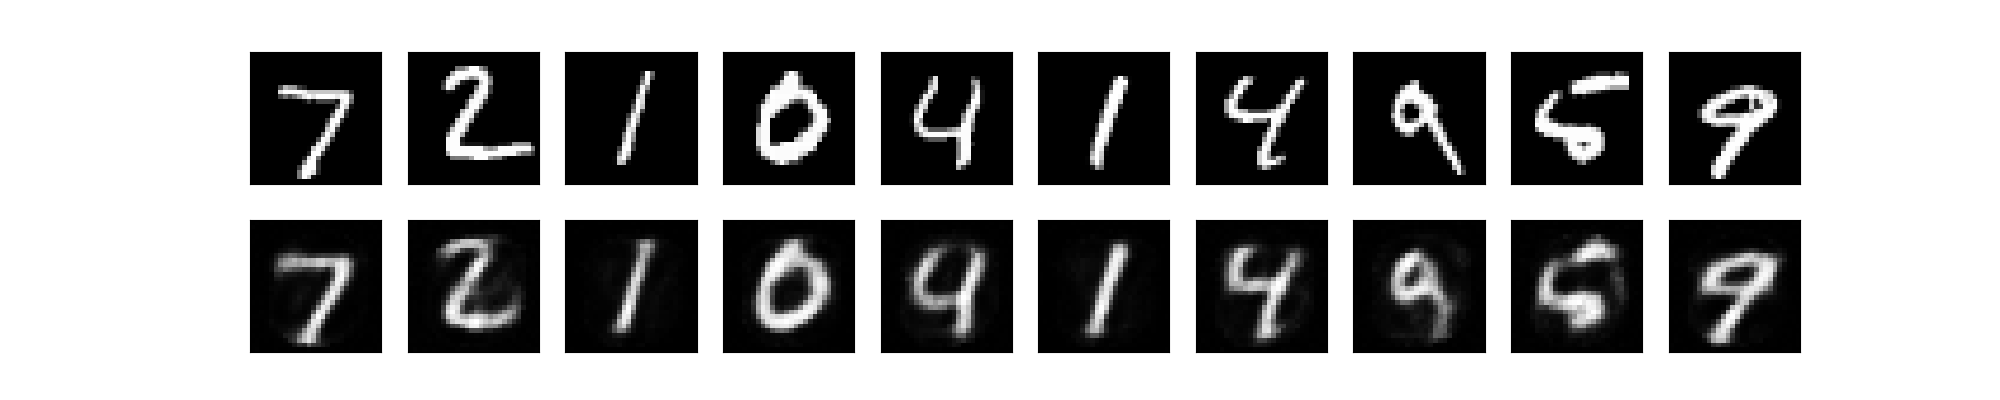

In [68]:
from IPython.display import Image
Image(filename='mnist_test_autoencoder.png')